# I. Classification

In [3]:
#Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

#Load the digits dataset: digits
digits = datasets.load_digits()

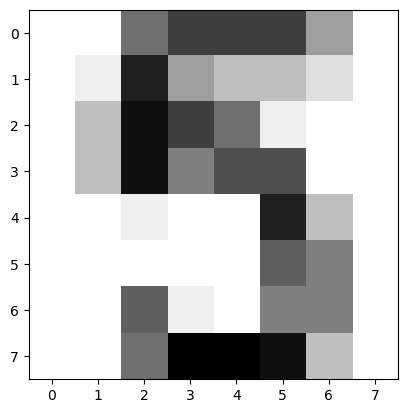

In [4]:
#Display image 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation = 'nearest')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target

#Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

In [6]:
#import necessary modules
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

#Create a K-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the classifier to the training data
knn.fit(X_train, y_train)
#Print the accuracy
print("Accuracy: {0}".format(knn.score(X_test, y_test)))

Accuracy: 0.9861111111111112


E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Varying Number of Neighbours

E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

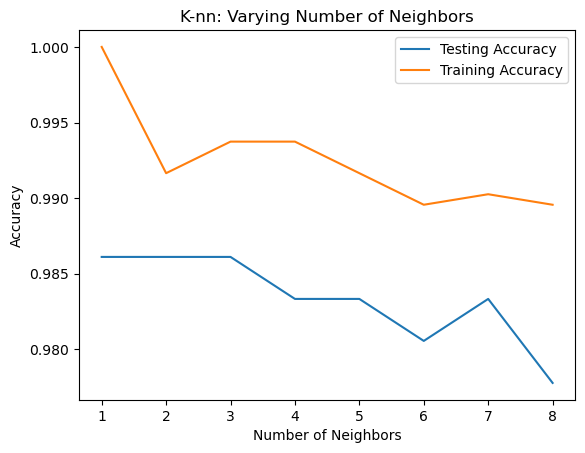

In [7]:
#Set up arrays to store train and test accuracies
neighbors = np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#Loop over different values of k
for i, k in enumerate(neighbors):
    #Set up a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors =k)
    
    #Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

#Generate plot
plt.title('K-nn: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Classification with deep learning


In [8]:
!pip install torch

In [9]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [10]:
!pip install torchvision

In [11]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.', train=True, download=True)

In [12]:
print("Number ò training examples", mnist.train_data.shape)
print("Image information", mnist[0])

Number ò training examples torch.Size([60000, 28, 28])
Image information (<PIL.Image.Image image mode=L size=28x28 at 0x1A51A82F700>, 5)


E:\Anaconda\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


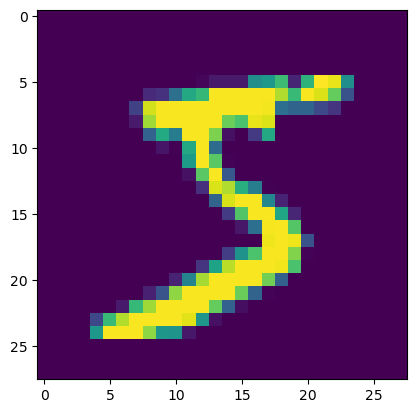

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(mnist[0][0])

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fully = nn.Sequential(
        nn.Linear(28*28, 10))
        
    def forward(self, x):
        x= x.view([-1, 28*28])
        x = self.fully(x)
        x =F.log_softmax(x, dim=1)
        return x

In [15]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train=True, transform=transforms.Compose([transforms.ToTensor()])), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train=True,transform=transforms.Compose([transforms.ToTensor()])), batch_size=1, shuffle=True)

In [16]:
def train():
    learning_rate = 1e-3;
    num_epochs=3
    
    net=Net()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            output = net(data)
            
            loss = F.nll_loss(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
            if batch_idx %100 ==0 :
                print('Epoch = %f.Batch = %s.Loss = %s ' % (epoch, batch_idx, loss.item()))
        return net
           
    

In [17]:
net = train()

Epoch = 0.000000.Batch = 0.Loss = 2.344655752182007 
Epoch = 0.000000.Batch = 100.Loss = 0.781818687915802 
Epoch = 0.000000.Batch = 200.Loss = 0.6181355118751526 
Epoch = 0.000000.Batch = 300.Loss = 0.460765540599823 
Epoch = 0.000000.Batch = 400.Loss = 0.40549129247665405 
Epoch = 0.000000.Batch = 500.Loss = 0.38686931133270264 
Epoch = 0.000000.Batch = 600.Loss = 0.3492695391178131 
Epoch = 0.000000.Batch = 700.Loss = 0.3963686525821686 
Epoch = 0.000000.Batch = 800.Loss = 0.29858025908470154 
Epoch = 0.000000.Batch = 900.Loss = 0.347427636384964 


In [18]:
net.eval()
test_loss =0
correct =0
total =0

for data, target in test_loader:
    total += len(target)
    output = net(data)
    pred = output.max(1, keepdim=True)[1]
    correct += target.eq(pred.view_as(target)).sum()
    
print("Correct out of %s" % total, correct.item())
print("Percentage accuracy", correct.item()*100/1000.)

Correct out of 60000 54356
Percentage accuracy 5435.6


# Linear Regression

Load the dataset

In [19]:
#Import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Read the CSV file into a DataFrame: df
df = pd.read_csv('gapminder.csv')

Use Seaborn to visualize the data of GapMinder like following image:


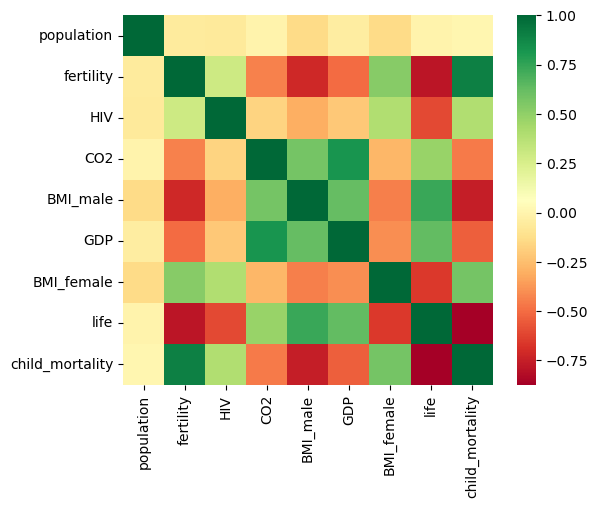

In [20]:
ax = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

Apply linear regression with the 'fertility' feature to predict life expectancy

0.6162438752151919


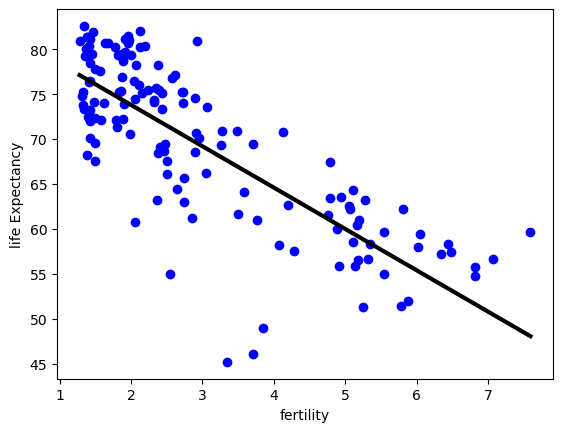

In [24]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

x_fertility = df['fertility'].values.reshape(-1,1)
y_life = df['life'].values.reshape(-1,1)
prediction_space = np.linspace(min(x_fertility), max(x_fertility)).reshape(-1,1)
#Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x_fertility, y_life, test_size=0.3, random_state=42)
#Create the regression model: req_all
reg = LinearRegression()

#Fit the regression to the training data
reg.fit(x_train, y_train)
y_predict = reg.predict(prediction_space)

#Print accuracy
print(reg.score(x_fertility, y_life))

#Plot regression line

plt.scatter(x_fertility, y_life , color = 'blue')
plt.plot(prediction_space, y_predict, color = 'black', linewidth=3)
plt.ylabel('life Expectancy')
plt.xlabel('fertility')
plt.show()

Apply linear regression with the all features to predict life expectancy. Compare the model score when 
using all features to one feature in previous step

In [26]:
features =pd.read_csv('gapminder.csv')
df = pd.read_csv('gapminder.csv')
del features['life']
del features['Region']

y_life = df['life'].values.reshape(-1,1)

#Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(features, y_life, test_size=0.3, random_state=42)

#Create the regression model: reg_all
reg_all = LinearRegression()

#Fit the regression to the training data
reg_all.fit(x_train, y_train)

#Print accuracy
print(reg_all.score(features, y_life))

0.8914651485793137


# Linear Regression using PyTorch

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


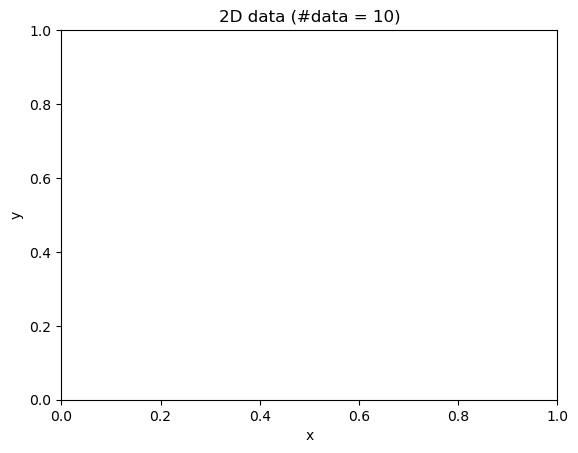

In [29]:
N=10
m=.9
c=1
x = np.linspace(0.2*np.pi, N)
y= m*x + c +np.random.normal(0, .3, x.shape)
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data (#data = %d)' %N)
plt.show()

In [30]:
import torch

# Dataset

In [31]:
from torch.utils.data import Dataset
class MyDataset(Dataset):
    def __init__(self, x, y):
        self.x=x
        self.y=y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        sample ={
            'feature':torch.tensor([1, self.x[idx]]),
            'label': torch.tensor([self.y[idx]])
        }
        return sample

In [32]:
dataset = MyDataset(x,y)
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['feature'], sample['label'])

0 tensor([1.0000, 0.6283], dtype=torch.float64) tensor([1.4529], dtype=torch.float64)
1 tensor([1.0000, 0.8196], dtype=torch.float64) tensor([1.7379], dtype=torch.float64)
2 tensor([1.0000, 1.0108], dtype=torch.float64) tensor([2.0074], dtype=torch.float64)
3 tensor([1.0000, 1.2021], dtype=torch.float64) tensor([1.7360], dtype=torch.float64)
4 tensor([1.0000, 1.3934], dtype=torch.float64) tensor([2.3398], dtype=torch.float64)
5 tensor([1.0000, 1.5846], dtype=torch.float64) tensor([2.1558], dtype=torch.float64)
6 tensor([1.0000, 1.7759], dtype=torch.float64) tensor([2.7595], dtype=torch.float64)
7 tensor([1.0000, 1.9671], dtype=torch.float64) tensor([2.6587], dtype=torch.float64)
8 tensor([1.0000, 2.1584], dtype=torch.float64) tensor([2.5579], dtype=torch.float64)
9 tensor([1.0000, 2.3496], dtype=torch.float64) tensor([3.1326], dtype=torch.float64)
10 tensor([1.0000, 2.5409], dtype=torch.float64) tensor([2.6420], dtype=torch.float64)
11 tensor([1.0000, 2.7322], dtype=torch.float64) tens

# Dataloader


In [ ]:
from torch.utils.data import DataLoader

dataset = MyDataset(x,y)
batch_size = 1
shuffle = True
num_workers =8
dataloader = DataLoader(dataset, batch_size =batch_size, shuffle=shuffle, num_workers=num_workers)

In [82]:
import pprint as pp
for i_batch, samples in enumerate(dataloader):
    print('\nbatch# = %s' % i_batch)
    print('samples: ')
    pp.pprint(samples)

RuntimeError: DataLoader worker (pid(s) 2564, 13500, 13004, 14832, 1184, 17896, 14552, 7800, 7704, 15552) exited unexpectedly

# Model

In [57]:
!pip install torch.nn.function

ERROR: Could not find a version that satisfies the requirement torch.nn.function (from versions: none)
ERROR: No matching distribution found for torch.nn.function


In [58]:
import torch.nn as nn
import torch.nn.functional as F

class MyModel(nn.Module):
    def __init__(self, input_dim,output_dim):
        super(MyModel ,self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out =self.linear(x)
        return out

# Setting a model for out problem

In [60]:
input_dim=2
output_dim=1

model = MyModel(input_dim, output_dim)

# Cost Function

Often called loss or error

In [61]:
cost = nn.MSELoss()

# Minimizing the cost function

In other words training (or learning from data)

In [81]:
num_epochs = 10 #How many itesm the entires training data is seen?
l_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr = l_rate)

dataset =MyDataset(x,y)
batch_size = 1
shuffle = True 
num_workers = 8

training_sample_generator = DataLoader(dataset, batch_size = batch_size, shuffle=shuffle, num_workers = num_workers)

for epoch in range(num_epochs):
    print('Epoch = %s' % epoch)
    for batch_i, samples in enumerate (training_sample_generator):
        predictions = model(samples['features'])
        error = cost(predictions, samples['label'])
        print('\tBatch = %s, Error = %s' % (batch_i, error.item()))
        optimiser.zero_grad()
        error.backward()
        optimiser.step()
                     

Epoch = 0


RuntimeError: DataLoader worker (pid(s) 1120, 19624, 7340, 15244, 19192, 11188, 10920, 17616) exited unexpectedly

# Lets see how well the model has learnt the data

In [84]:
x_for_plotting = np.linspace(0, 2*np.pi, 1000)
design_matrix = torch.tensor(np.vstack([np.ones(x_for_plotting.shape) , x_for_plotting]).T, dtype=torch.float32)
print('Design matrix shape: ', design_matrix.shape)

y_for_plotting = model.forward(design_matrix)
print('y_for_plotting shape: ', y_for_plotting.shape)


Design matrix shape:  torch.Size([1000, 2])
y_for_plotting shape:  torch.Size([1000, 1])


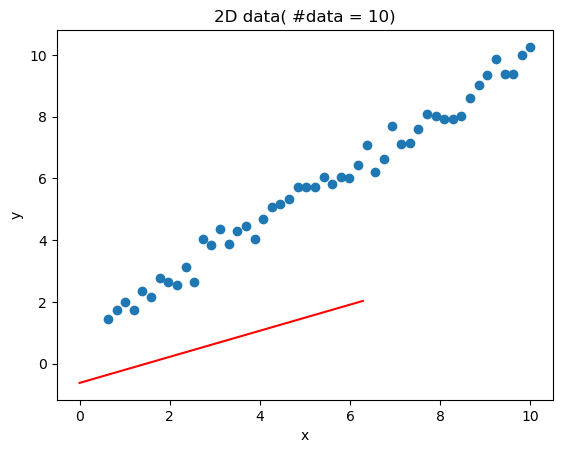

In [86]:
plt.figure()
plt.plot(x,y,'o')
plt.plot(x_for_plotting, y_for_plotting.data.numpy() , 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D data( #data = %d)' %N)
plt.show()

# Recommendation Systems

In [87]:
def user_cf(M, metric ='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis =1)
    sim_users = sim_matrix(M, 'user', metric)
    for i in range(n_users):
        for j in range (n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[i] + np.nansum(sim_users[i]*(M[:j] - avg_ratings)) / sum(sim_users[i])
    return pred

In [88]:
def item_cf (M, metric ='cosine'):
    pred = np.copy(M)
    n_users, n_items = M.shape
    avg_ratings = np.nanmean(M, axis =0)
    sim_items = sim_matrix(M, 'item', metric)
    for i in range(n_users):
        for j in range (n_items):
            if np.isnan(M[i,j]):
                pred[i,j] = avg_ratings[i] + np.nansum(sim_items[i]*(M[:j] - avg_ratings)) / sum(sim_items[i])
    return pred

Compute the predictive accuracy of the above recommendations


In [89]:
evaluateRS(M, M_result, 'user_cf', 'cosine')
evaluateRS(M, M_result, 'user_cf', 'correlation')
evaluateRS(M, M_result, 'item_cf', 'cosine')
evaluateRS(M, M_result, 'item_cf', 'correlation')

NameError: name 'evaluateRS' is not defined

# IV. Exerises


1. Clasification

 Load this dataset from scikit-learn  

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = iris.data
y = iris.target

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = iris.data
y = iris.target

In [14]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
# Classify using kNN with different values of k
k_values = [1, 3, 5, 7, 9]
knn_accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knn_accuracies.append(accuracy)


E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
E:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avo

In [18]:
from sklearn.neural_network import MLPClassifier

In [19]:
# Classify using a simple neural network
nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, y_pred)

E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
import matplotlib.pyplot as plt

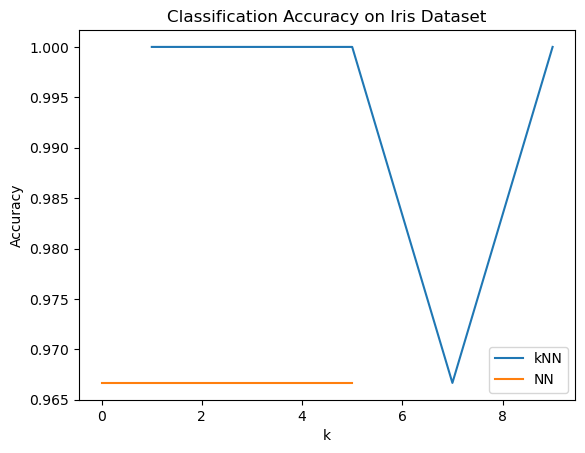

In [22]:
# Plot the results
plt.plot(k_values, knn_accuracies, label='kNN')
plt.plot([0, len(k_values)], [nn_accuracy, nn_accuracy], label='NN')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy on Iris Dataset')
plt.legend()
plt.show()

# 2. Recommendation Systems 

a. Content-Based Recommendation Model

In [30]:
#Import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Read the CSV file into a DataFrame: df


In [25]:
df2 = pd.read_csv('users.csv')

In [27]:
df1 = pd.read_csv('ratings.csv')

In [29]:
df0 = pd.read_csv('movies.csv')

In [31]:
df2

,user_id,gender,age,occupation,zipcode,age_desc,occ_desc
0,1,F,1,10,48067,Under 18,K-12 student
1,2,M,56,16,70072,56+,self-employed
2,3,M,25,15,55117,25-34,scientist
3,4,M,45,7,2460,45-49,executive/managerial
4,5,M,25,20,55455,25-34,writer
...,...,...,...,...,...,...,...
95,96,F,25,16,78028,25-34,self-employed
96,97,F,35,3,66210,35-44,clerical/admin
97,98,F,35,7,33547,35-44,executive/managerial
98,99,F,1,10,19390,Under 18,K-12 student


In [32]:
df1

,user_id,movie_id,rating
0,1,1,3
1,1,3,5
2,1,4,4
3,1,5,3
4,1,6,3
...,...,...,...
7507,100,96,4
7508,100,97,4
7509,100,98,5
7510,100,99,5


In [33]:
df0

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
95,96,In the Bleak Midwinter (1995),Comedy
96,97,Hate (Haine,NaN
97,98,Shopping (1994),Action|Thriller
98,99,Heidi Fleiss: Hollywood Madam (1995),Documentary


In [35]:
df0.dropna()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
94,95,Broken Arrow (1996),Action|Thriller
95,96,In the Bleak Midwinter (1995),Comedy
97,98,Shopping (1994),Action|Thriller
98,99,Heidi Fleiss: Hollywood Madam (1995),Documentary


In [39]:
# Replace missing values in the 'genres' column with an empty string
df0['genres'].fillna('', inplace=True)

In [41]:
genres_list = set()
for genres_str in df0['genres']:
    genres_list.update(genres_str.split(','))

In [42]:
# Print the list of unique genres
print(list(genres_list))

['', 'Drama|Sci-Fi', 'Action|Crime|Thriller', 'Drama|War', 'Comedy|Drama', "Children's|Comedy", "Adventure|Children's|Fantasy", 'Action|Adventure|Thriller', "Children's|Comedy|Drama", 'Action|Adventure', 'Crime|Drama|Thriller', 'Action|Comedy|Crime|Horror|Thriller', 'Crime|Drama|Romance', 'Action|Crime|Drama', 'Comedy', 'Documentary', 'Action|Thriller', 'Drama|Thriller', "Adventure|Children's", 'Adventure|Romance', 'Comedy|Horror', 'Drama', "Animation|Children's", 'Action|Adventure|Romance', 'Crime|Thriller', 'Comedy|Romance', 'Thriller', "Animation|Children's|Musical|Romance", 'Drama|Romance', 'Action|Comedy|Drama', 'Action', "Animation|Children's|Comedy", 'Sci-Fi|Thriller', 'Action|Drama|Thriller', 'Adventure|Drama', 'Romance']


In [45]:
# Get the set of unique genres across all movies
unique_genres = set(genre for genres in genres_list for genre in genres)


In [47]:
# Create a DataFrame with a binary column for each unique genre
genre_columns = pd.DataFrame(0, index=df0.index, columns=unique_genres)

In [48]:
# Set the value of each genre column to 1 for movies that belong to that genre
for i, genres in enumerate(genres_list):
    genre_columns.loc[i, genres] = 1


In [50]:
# Concatenate the original DataFrame and the genre columns
df0 = pd.concat([df0, genre_columns], axis=1)

# Rename the columns to make them easier to work with
df0.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)


In [52]:
# Print the resulting DataFrame
print(df0.head())

   movie_id                               title                        genres  \
0         1                    Toy Story (1995)   Animation|Children's|Comedy   
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2         3             Grumpier Old Men (1995)                Comedy|Romance   
3         4            Waiting to Exhale (1995)                  Comedy|Drama   
4         5  Father of the Bride Part II (1995)                        Comedy   

   t  l  e  w  s  i  -  ...  thriller  animation|children's|musical|romance  \
0  0  0  0  0  0  0  0  ...       NaN                                   NaN   
1  0  0  0  0  0  0  0  ...       NaN                                   NaN   
2  0  0  0  0  0  0  0  ...       NaN                                   NaN   
3  0  0  0  0  0  0  0  ...       NaN                                   NaN   
4  0  0  0  0  0  0  0  ...       NaN                                   NaN   

   drama|romance  action|comedy|drama 

In [53]:
# Create a one-hot encoded representation of the genres for each movie
genres_one_hot = genres_list.str.join('|').str.get_dummies()

AttributeError: 'set' object has no attribute 'str'

In [55]:
# Split the genres string into a list of individual genres
genres_list = df0['genres'].str.split(',')

In [57]:
# Get the set of unique genres across all movies
unique_genres = sorted(set(genre for genres in genres_list for genre in genres))

# Create a DataFrame with a binary column for each unique genre
genre_matrix = pd.DataFrame(0, index=df0.index, columns=unique_genres)

In [58]:
# Set the value of each genre column to 1 for movies that belong to that genre
for i, genres in enumerate(genres_list):
    genre_matrix.loc[i, genres] = 1

# Print the resulting matrix
print(genre_matrix.head())

      Action  Action|Adventure  Action|Adventure|Romance  \
0  0       0                 0                         0   
1  0       0                 0                         0   
2  0       0                 0                         0   
3  0       0                 0                         0   
4  0       0                 0                         0   

   Action|Adventure|Thriller  Action|Comedy|Crime|Horror|Thriller  \
0                          0                                    0   
1                          0                                    0   
2                          0                                    0   
3                          0                                    0   
4                          0                                    0   

   Action|Comedy|Drama  Action|Crime|Drama  Action|Crime|Thriller  \
0                    0                   0                      0   
1                    0                   0                      0   
2                

In [65]:
# Create a set of all unique genres
genres = set()
for genre_list in df0["genres"].str.split("|"):
    genres.update(genre_list)


In [66]:
# Create a dictionary to map each genre to an index
genre_to_idx = {genre: i for i, genre in enumerate(genres)}

# Create a list to hold the vectorized genre information for each movie
genre_vectors = []

In [68]:
# Loop over each movie
for genres_str in df0["genres"]:
    # Split the genre string into a list of individual genres
    genre_list = genres_str.split("|")
    
    # Create a binary vector to represent the genres of the current movie
    genre_vector = [0] * len(genres)
    for genre in genre_list:
        genre_idx = genre_to_idx[genre]
        genre_vector[genre_idx] = 1
    
    # Append the genre vector to the list of genre vectors
    genre_vectors.append(genre_vector)

In [71]:
# Convert the list of genre vectors into a numpy array
Ij = np.array(genre_vectors)

In [73]:
print(Ij[:4])

[[0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0]]


Vectorize the relationship between users and genres and put them into Uj (if user rate for a movie, 
he/she has the related history with the movies’genres).

In [74]:
# Create a set of all unique genres
genres = set()
for genre_list in df0["genres"].str.split("|"):
    genres.update(genre_list)


In [75]:
# Create a dictionary to map each genre to an index
genre_to_idx = {genre: i for i, genre in enumerate(genres)}


In [80]:
# Create a dictionary to map each movie ID to a list of genre indices
movie_genres = {}
for movieId, genres_str in zip(df0["movie_id"], df0["genres"]):
    genre_list = genres_str.split("|")
    genre_indices = [genre_to_idx[genre] for genre in genre_list]
    movie_genres[movieId] = genre_indices

In [84]:
# Create a dictionary to map each user ID to a list of movie IDs and ratings
user_history = {}
for userId, movieId, rating in zip(df1["user_id"], df1["movie_id"], df1["rating"]):
    if userId not in user_history:
        user_history[userId] = []
    user_history[userId].append((movieId, rating))


In [85]:
# Create a list to hold the vectorized genre information for each user
user_genre_vectors = []

In [88]:
# Loop over each user
for userId in df2["user_id"]:
    # Get the list of movie IDs and ratings for the current user
    user_movies = user_history.get(userId, [])
    
    # Create a binary vector to represent the genres of the movies that the user has rated
    genre_vector = [0] * len(genres)
    for movieId, rating in user_movies:
        if movieId in movie_genres:
            for genre_idx in movie_genres[movieId]:
                genre_vector[genre_idx] = 1
    # Append the genre vector to the list of user genre vectors
    user_genre_vectors.append(genre_vector)

In [89]:

# Convert the list of user genre vectors into a numpy array
Uj = np.array(user_genre_vectors)

In [90]:
print(Uj[:4])

[[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]]


In [91]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [92]:
# compute cosine similarity between Ij and Uj
cos_sim = cosine_similarity(Ij.T, Uj.T)

In [95]:
cos_sim

array([[0.38729833, 0.38924947, 0.32366944, 0.38729833, 0.38729833,
        0.37283655, 0.38729833, 0.38729833, 0.39285863, 0.39324188,
        0.38729833, 0.38729833, 0.38729833, 0.37086906, 0.38729833,
        0.38729833],
       [0.17320508, 0.17407766, 0.13159034, 0.17320508, 0.17320508,
        0.1786474 , 0.17320508, 0.17320508, 0.        , 0.17586311,
        0.17320508, 0.17320508, 0.17320508, 0.17770466, 0.17320508,
        0.17320508],
       [0.1       , 0.10050378, 0.11396058, 0.1       , 0.1       ,
        0.10314212, 0.1       , 0.1       , 0.        , 0.10153462,
        0.1       , 0.1       , 0.1       , 0.10259784, 0.1       ,
        0.1       ],
       [0.37416574, 0.37605072, 0.21320072, 0.37416574, 0.37416574,
        0.38592249, 0.37416574, 0.37416574, 0.31280562, 0.35277148,
        0.37416574, 0.37416574, 0.37416574, 0.38388595, 0.37416574,
        0.37416574],
       [0.64031242, 0.62784215, 0.56952486, 0.64031242, 0.64031242,
        0.59599946, 0.64031242, 

# b. Collaborative Filtering Recommendation Model by Users

In [111]:
# Split the data into training and testing sets
train_data, test_data = train_test_split(df1, test_size=0.5, random_state=42)

# Create the user-item matrix for the training and testing sets
train_data_matrix = train_data.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)
test_data_matrix = test_data.pivot_table(index='user_id', columns='movie_id', values='rating').fillna(0)

In [112]:
import numpy as np

def pearson_similarity(df0):
    # Calculate the Pearson correlation similarity between all pairs of users.
    corr_matrix = np.corrcoef(df0)
    # Set the diagonal to 0 to ignore similarity between user and itself.
    np.fill_diagonal(corr_matrix, 0)
    return corr_matrix

# Assuming the train_data_matrix contains the user-movie ratings matrix with user ids as index and movie ids as columns.
user_correlation = pearson_similarity(train_data_matrix.values)
print("User correlation matrix:\n", user_correlation)

User correlation matrix:
 [[ 0.         -0.14337447 -0.09069978 ... -0.05420863  0.06369124
   0.05543262]
 [-0.14337447  0.         -0.13302999 ... -0.05059483  0.08023175
   0.05748911]
 [-0.09069978 -0.13302999  0.         ... -0.1669279  -0.02668941
  -0.03646205]
 ...
 [-0.05420863 -0.05059483 -0.1669279  ...  0.         -0.2516111
  -0.12687328]
 [ 0.06369124  0.08023175 -0.02668941 ... -0.2516111   0.
   0.20333568]
 [ 0.05543262  0.05748911 -0.03646205 ... -0.12687328  0.20333568
   0.        ]]


In [113]:
from sklearn.metrics.pairwise import pairwise_distances

def predict_user_cf(user_correlation, train_data_matrix, test_data_matrix, k=10, metric='cosine'):
    # Calculate the pairwise distance between users
    user_similarity = 1 - pairwise_distances(train_data_matrix, metric=metric)
    
    # Replace NaN values with 0
    user_similarity[np.isnan(user_similarity)] = 0
    
    # Initialize an empty array to store the predicted ratings
    pred = np.zeros(test_data_matrix.shape)
    
    # Loop over each user in the test data
    for i in range(test_data_matrix.shape[0]):
        # Find the k most similar users to the current user
        similar_users_idx = np.argsort(user_similarity[i,:])[:-k-1:-1]
        
        # Calculate the weighted average of the ratings given by the k most similar users
        for j in range(test_data_matrix.shape[1]):
            numerator = np.sum(user_similarity[i,similar_users_idx] * train_data_matrix[similar_users_idx,j])
            denominator = np.sum(user_similarity[i,similar_users_idx])
            pred[i,j] = numerator / denominator if denominator != 0 else 0
    
    return pred